# A notebook with the FRB/US model
This notebook is based on the the FRB/US model packages located here (https://www.federalreserve.gov/econres/us-models-package.htm). The packages provides an Eviews (https://www.eviews.com/) implementation. The Eviews modelspecification has been transformed to ModelFlow BusinessLogic specification. 

FRB/US comes in two flawors: **VAR** in which expectaions are generated by backward looking equations, and **MCE** in which expectation are based on leaded values.

This notebook implement the **MCE** flavour. The presence of leaded variable implies that the model has to be solved for all quarters in one go. The **VAR** model which has only lagged variables can be solved for each quarter in turn. 

The tool used is highly experimental and the results are purely for illustration. 

You can run each cell by pressing the run tool or shift+enter
To run all cells use select cell/run all in the menu bar. 
You ca run each cell by pressing the run tool or shift+enter

# Import stuff

In [1]:
import pandas as pd

from modelclass import model
import modelmf
model.modelflow_auto()

# Load the model and a baseline databank

In [2]:
mfrbusmce,basedf = model.modelload('mfrbusmce.json')
trans = {'XGDPN':'GDP real terms (XGDPN)','RFF':'Federal Funds Rate (RFF)','GFSRPN':'Federal Budget surplus',
        'RFFMIN':'Minimum Fed Funds'}

# Run the baseline 

In [3]:
baseres = mfrbusmce(basedf,'2020q1','2040q4', silent=1)

# Make a number of experiments, and run them 

In [4]:
mfrbusmce.keep_solutions = {}
for shock in [0.0, 0.005 ,0.01 ,0.1]:
    altdf = baseres.copy()
    altdf=altdf.mfcalc(f'''\
    rffintay_aerr = rffintay_aerr + {shock}
    dmpex    = 0 
    dmprr    = 0
    dmptay   = 0
    dmptlr   = 0 
    dmpintay = 1
    
    dmpalt   = 0
    dmpgen   = 0
    ''')       
        
    with model.timer(f'newton all periods,shock = {shock:7} '):
        altres = mfrbusmce(altdf,keep=f'Shock={shock}',silent=1)

newton all periods,shock =     0.0  took       :         0.0817811489 Seconds
newton all periods,shock =   0.005  took       :         0.4208741188 Seconds
newton all periods,shock =    0.01  took       :         0.5694890022 Seconds
newton all periods,shock =     0.1  took       :         5.872 Seconds


# Display results 

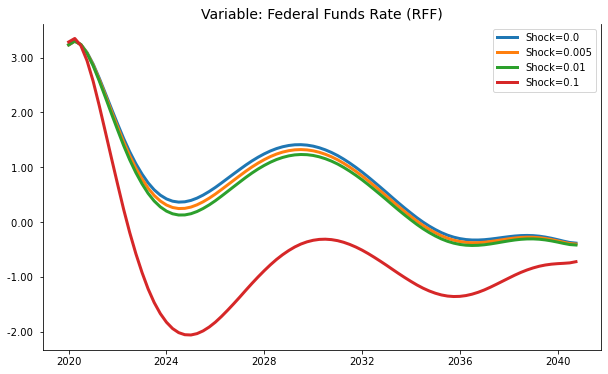

In [5]:
mfrbusmce.keep_plot('rff',diff=0,showtype='level',trans=trans,dec=2);

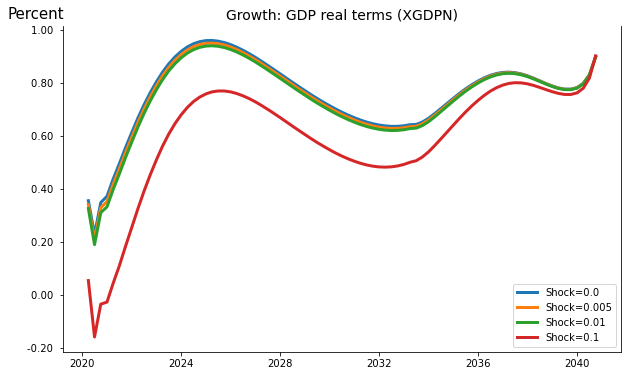

In [6]:
mfrbusmce.keep_plot('xgdpn',diff=0,legend=1,showtype='growth',dec=0,trans=trans);